In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import itertools
import numpy as np
import matplotlib.pyplot as plt
import pickle

# **Exercise 1**

In [10]:
!wget "https://www.dropbox.com/s/aamg1apjhclecka/regression_generated.csv" -P ./data/

--2022-12-02 09:58:12--  https://www.dropbox.com/s/aamg1apjhclecka/regression_generated.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:6018:18::a27d:312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/aamg1apjhclecka/regression_generated.csv [following]
--2022-12-02 09:58:12--  https://www.dropbox.com/s/raw/aamg1apjhclecka/regression_generated.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc8bee88e3f878f8274bd4cb193a.dl.dropboxusercontent.com/cd/0/inline/Bx0LOXhaT8NnKr4BOeLKSqCvxeUbRThk4Kj7qPKERdEeZDb6Qua1oSl9fLm2vsPGSXvimWKMgb9vKVkhzP_hrbpiKdbw7_NZtB4QRs07tCs_5ESXvYMkYwu9Dl-AjN_H57sInx7ZZZyt_G97z11P8YCvUrqMwmcBrp1rhFoYtuPmng/file# [following]
--2022-12-02 09:58:12--  https://uc8bee88e3f878f8274bd4cb193a.dl.dropboxusercontent.com/cd/0/inline/Bx0LOXhaT8NnKr4BOeLKSqCvxeUbRThk4Kj7qPKERdEe

In [11]:
file_name = "./data/regression_generated.csv"
data = pd.read_csv(file_name)
data

,label,features_1,features_2,features_3,features_4,features_5,features_6,features_7,features_8,features_9,...,features_11,features_12,features_13,features_14,features_15,features_16,features_17,features_18,features_19,features_20
0,-89.243497,2.175170,-0.285786,-0.603396,-0.627453,-0.686474,0.381067,0.306205,-0.637447,-1.332087,...,1.290725,1.047483,-1.055467,0.853204,0.038665,-0.752959,0.577920,-0.657400,1.367308,0.570199
1,230.050125,1.481941,-1.327870,-0.543583,-0.303578,1.552964,0.549738,-0.763094,-0.455796,2.053388,...,-1.761306,-0.934284,-1.050999,0.444026,-0.037959,1.061624,-1.569870,2.410696,1.113594,2.329479
2,-286.844411,-1.154394,-0.178649,-1.636646,0.239353,-0.684994,0.587201,-0.209564,-0.428956,-0.757998,...,0.374645,-1.702189,-0.014514,-0.711557,-0.558523,-1.204526,0.234989,0.398384,-0.236555,0.642003
3,364.552862,0.197665,1.455707,1.562205,2.168207,0.053335,0.790492,-0.212023,-1.142483,-1.124906,...,0.712160,-2.844936,0.483994,-0.694294,1.349605,-1.303414,0.161987,0.754084,1.248258,-1.466045
4,515.460006,0.596676,0.969860,1.294158,-0.404728,2.145297,0.997481,-0.541670,-0.952850,-0.592084,...,-1.347072,0.243422,0.290336,0.798331,0.876428,-0.366807,-0.119534,0.892320,-0.806912,0.736080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,-328.100239,-1.820929,1.358539,-2.494838,0.828299,0.199255,0.142303,-0.582563,0.472356,-1.411304,...,-1.062502,2.299985,-0.085065,0.357165,-1.400150,-0.976176,-0.796009,-0.148662,0.978054,-0.804272
1996,-62.960036,-0.883712,-0.063687,-0.418704,-0.872601,0.363769,-0.368570,-0.104321,-2.493615,-1.694770,...,-0.197659,-0.533637,-0.598431,-0.039737,1.882953,-1.837356,0.583887,0.603931,-0.356482,0.029355
1997,-90.262252,-0.021394,-0.312864,-0.730848,-1.341482,-0.720862,-0.683872,-0.805370,-0.521334,-0.074645,...,1.899276,0.417949,0.324229,0.448252,-0.282110,-2.320763,1.484126,0.392324,-1.116838,-0.459027
1998,-74.333901,-0.041909,-0.862731,-1.232011,1.268843,0.093043,1.684069,0.753851,-0.537096,-0.971790,...,1.401321,-0.933149,-0.166864,1.152448,1.605114,-1.339651,0.105628,0.676177,-0.035598,-1.329490


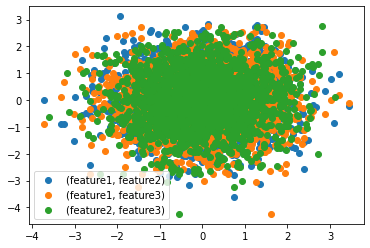

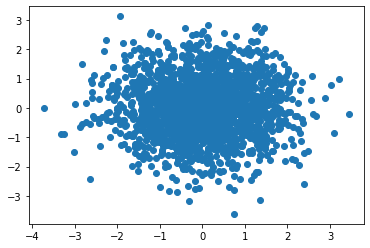

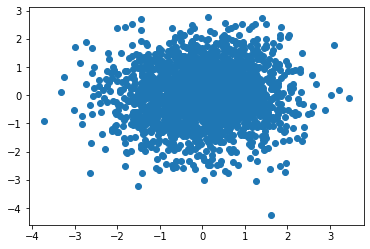

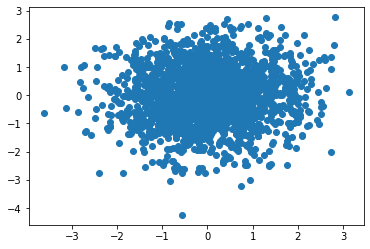

In [12]:
feature1 = data['features_1']
feature2 = data['features_2']
feature3 = data['features_3']

d = dict(feature1=feature1, feature2=feature2, feature3=feature3)
fig, ax = plt.subplots()
for (xk, xv), (yk, yv) in itertools.combinations(d.items(), 2):
    ax.scatter(xv, yv, label=f'({xk}, {yk})')
ax.legend()
plt.show()

for pair in itertools.combinations((feature1,feature2,feature3), 2):
    fig, ax = plt.subplots()
    ax.scatter(pair[0], pair[1],label=f'({xk}, {yk})')
plt.show()

# **Exercise 2**

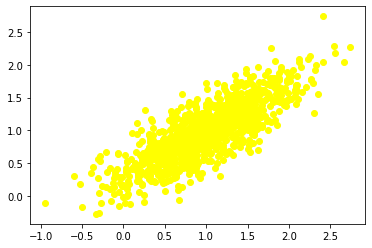

In [19]:
def twoDdata():
  linalg = np.linalg
  N = 1000
  mean = [1,1]
  cov = [[0.3, 0.2],[0.2, 0.2]]
  data = np.random.multivariate_normal(mean, cov, N)
  L = linalg.cholesky(cov)
  plt.scatter(data[:,0], data[:,1], c='yellow')
  plt.show()
twoDdata()

In [37]:
from re import X
def twod(n):
  x = []
  y = []
  for i in range(0,2):
    x[i] = np.random.normal(0,10,2)
    y[i] = np.random.normal(0,10,2)

  fig = plt.figure(figsize=(10,10))
  plt.scatter(x[0],y[0], alpha=0.4)
  plt.scatter(x[1],y[2], alpha=0.4)
  plt.title("2D  data")
  plt.xlabel("x")
  plt.ylabel("y")
  plt.legend()

twod(10)


IndexError: ignored

# **Exercise 3**

In [7]:
!wget "https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl" -P data/
filed = "./data/residuals_261.pkl"
with open('./data/residuals_261.pkl', 'rb') as f:
    data_re = pickle.load(f)


--2022-12-02 14:53:55--  https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6017:18::a27d:212
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/3uqleyc3wyz52tr/residuals_261.pkl [following]
--2022-12-02 14:53:55--  https://www.dropbox.com/s/raw/3uqleyc3wyz52tr/residuals_261.pkl
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc16baaaa15b4ea6b3102ee3db6e.dl.dropboxusercontent.com/cd/0/inline/Bx0TGL1hlNaZ8Y0sBexaBXyXFiWQYXJQ30vWk0NfQYSwQjECmsU2SJk6WWJliaNL3Z8Wnlrh8Kgk7IQhCvke3nDP6s8BhsIc8VeW2hHyBacAbLF9jD_pDmTlR-11rJib__VMRtRM5uFX4MvlpaC-Nn1fgVjMuxjrtI2GS4O27iextA/file# [following]
--2022-12-02 14:53:55--  https://uc16baaaa15b4ea6b3102ee3db6e.dl.dropboxusercontent.com/cd/0/inline/Bx0TGL1hlNaZ8Y0sBexaBXyXFiWQYXJQ30vWk0NfQYSwQjECmsU2SJk6WWJliaNL3

In [9]:
type(data_re)

numpy.ndarray